In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-crime/train.csv.zip
/kaggle/input/sf-crime/sampleSubmission.csv.zip
/kaggle/input/sf-crime/test.csv.zip


In [57]:
train = pd.read_csv('/kaggle/input/sf-crime/train.csv.zip')
test = pd.read_csv('/kaggle/input/sf-crime/test.csv.zip')
sub = pd.read_csv('/kaggle/input/sf-crime/sampleSubmission.csv.zip')

In [58]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [59]:
test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [60]:
sub.head()

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [76]:
all_df = pd.concat([train, test], sort = False)

In [77]:
all_df

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Id
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,NaN
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,NaN
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,NaN
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,NaN
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,NaN
...,...,...,...,...,...,...,...,...,...,...
884257,2003-01-01 00:01:00,NaN,NaN,Wednesday,MISSION,NaN,2600 Block of BRYANT ST,-122.408983,37.751987,884257.0
884258,2003-01-01 00:01:00,NaN,NaN,Wednesday,NORTHERN,NaN,1900 Block of WASHINGTON ST,-122.425342,37.792681,884258.0
884259,2003-01-01 00:01:00,NaN,NaN,Wednesday,INGLESIDE,NaN,5500 Block of MISSION ST,-122.445418,37.712075,884259.0
884260,2003-01-01 00:01:00,NaN,NaN,Wednesday,BAYVIEW,NaN,1500 Block of HUDSON AV,-122.387394,37.739479,884260.0


In [78]:
all_df['year'] = all_df['Dates'].astype('datetime64').dt.year

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 <a list of 39 Text major ticklabel objects>)

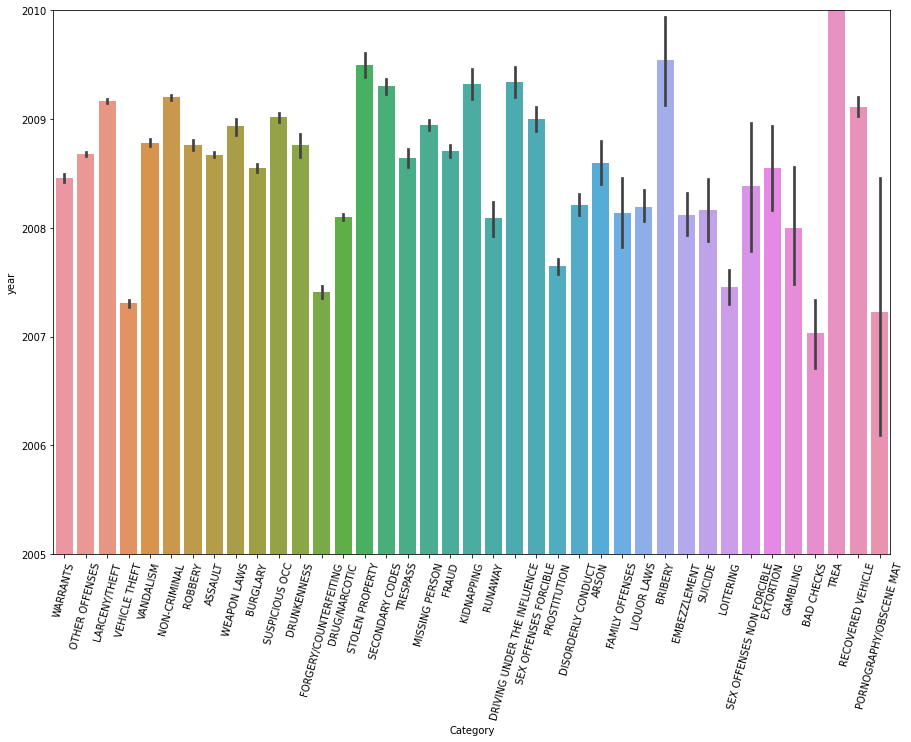

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
# countplot - 
# barplot - 
plt.figure(figsize = (15,10))
sns.barplot(all_df['Category'], all_df['year'])
plt.ylim(2005, 2010) # y limit
plt.xticks(rotation=75) # sns.barplot 밑에 써야함

# 요새 많이 발생하는 범죄, 예전에 발생하던 범죄를 볼 수 있음
# 검은색 선은 편차. 검은색 선이 길면 편차가 심함. 짧으면 저 연도에만 특히 일어났다고 해석하면 됨.


In [82]:
all_df.head(50)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Id,year,isBlock
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,NaN,2015,False
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,NaN,2015,False
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,NaN,2015,False
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,NaN,2015,True
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,NaN,2015,True
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,NaN,2015,True
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138,NaN,2015,False
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,NaN,2015,False
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601,NaN,2015,True
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802,NaN,2015,False


In [84]:
# all_df Address에 / 이 들어있냐, Block of 들어있는지 확인하는 피쳐 넣으면 점수 오름

all_df['isBlock'] = all_df['Address'].str.contains('Block', case=False) # case 대소문자 구분 안한다는 옵션(uppercase, lowercase 이런말인듯)

all_df['isAV'] = all_df['Address'].str.contains('AV', case=False) # case 대소문자 구분 안한다는 옵션(uppercase, lowercase 이런말인듯)
all_df['isSla'] = all_df['Address'].str.contains('/', case=False) # case 대소문자 구분 안한다는 옵션(uppercase, lowercase 이런말인듯)
all_df['isStreet'] = all_df['Address'].str.contains('st', case=False) # case 대소문자 구분 안한다는 옵션(uppercase, lowercase 이런말인듯)


# all_df.groupby('Category')['isBlock'].mean()
# barplot, countplot 봐보자!

In [85]:
from keras.preprocessing.text import Tokenizer

In [89]:
tk = Tokenizer()

tk.fit_on_texts(all_df['Address'])

In [ ]:
all_text = tk.texts_to_sequences(all_df['Address'])

In [91]:
all_text[0]

[147, 1, 98, 1]

In [93]:
from keras.preprocessing.sequence import pad_sequences

pad_text = pad_sequences(all_text)

In [94]:
pad_text[0] # pad를 앞에 채우는 것이 뒤에 채우는 것보다 점수가 보통 더 높음. 
# 왜냐 앞쪽에 중요한 말이 안나옴. 보통 뒷쪽에 중요한 말이 나옴. '안녕하세요? 잘 지내시죠? 저는 캐글러입니다.' 이처럼 앞은 인사말처럼 똑같은 말 나옴.
# 캐글러라는 중요한 정보는 뒤에있음.

array([  0,   0,   0,   0,   0, 147,   1,  98,   1], dtype=int32)

In [ ]:
# 아웃풋을 39개로 정해서 모델 만들어서 피쳐로 활용해보자.

In [88]:
tk.word_index # 가장 많이 등장한 순서대로 index 찍힘. isOf, isBlock, isMission, isMarket 이런 피쳐 넣어주면 도움.

{'st': 1,
 'of': 2,
 'block': 3,
 'av': 4,
 '0': 5,
 '100': 6,
 '800': 7,
 'mission': 8,
 'market': 9,
 '200': 10,
 '400': 11,
 '300': 12,
 'bryant': 13,
 '500': 14,
 'bl': 15,
 '600': 16,
 '700': 17,
 '1000': 18,
 'geary': 19,
 'turk': 20,
 '900': 21,
 '3rd': 22,
 'eddy': 23,
 '1200': 24,
 'dr': 25,
 '1100': 26,
 'ellis': 27,
 '16th': 28,
 '6th': 29,
 'ofarrell': 30,
 '1300': 31,
 '1400': 32,
 '2000': 33,
 '1500': 34,
 'jones': 35,
 'hyde': 36,
 'folsom': 37,
 '1600': 38,
 'leavenworth': 39,
 '1700': 40,
 'polk': 41,
 'golden': 42,
 'gate': 43,
 'larkin': 44,
 'taylor': 45,
 'harrison': 46,
 'powell': 47,
 '1800': 48,
 'vanness': 49,
 'post': 50,
 'haight': 51,
 '24th': 52,
 'fillmore': 53,
 'sutter': 54,
 'howard': 55,
 'potrero': 56,
 'california': 57,
 '17th': 58,
 'valencia': 59,
 '18th': 60,
 'van': 61,
 'ness': 62,
 'stockton': 63,
 'wy': 64,
 '2300': 65,
 'san': 66,
 '19th': 67,
 '20th': 68,
 '7th': 69,
 '2100': 70,
 '5th': 71,
 'bay': 72,
 '2200': 73,
 '4th': 74,
 'mason': 75,

In [ ]:
all_df = all_df.drop(['Dates', 'Category', 'Descript', 'Id', 'Resolution'], axis = 1)

In [ ]:
all_df.head()

In [46]:
all_df.nunique()
# Address   24777 unique 값이 너무 많음


DayOfWeek         7
PdDistrict       10
Address       24777
X             37348
Y             37241
year             13
dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

all_df['DayOfWeek'] = le.fit_transform(all_df['DayOfWeek'])
all_df['PdDistrict'] = le.fit_transform(all_df['PdDistrict'])
all_df['Address'] = le.fit_transform(all_df['Address']) # 문장 전처리 방법 알아야한다.

In [48]:
train2 = all_df[:len(train)] 
test2 = all_df[len(train):]

In [49]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train2, train['Category'], test_size=0.2, random_state=33, stratify=train['Category'])

In [51]:
lgb.get_params

<bound method LGBMModel.get_params of LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)>

In [52]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(num_leaves= 100, learning_rate=0.025, n_estimators=200)
lgb.fit(x_train, y_train, eval_set=(x_valid, y_valid))

# 연도 추가했더니 점수 더 나빠짐 - 왜그럴까? - address 가 매우 중요해서 year 추가해도 점수가 안오르거나 오히려 떨어짐.

[1]	valid_0's multi_logloss: 2.67304
[2]	valid_0's multi_logloss: 2.65506
[3]	valid_0's multi_logloss: 2.65109
[4]	valid_0's multi_logloss: 2.64035
[5]	valid_0's multi_logloss: 2.63433
[6]	valid_0's multi_logloss: 2.62587
[7]	valid_0's multi_logloss: 2.62045
[8]	valid_0's multi_logloss: 2.6121
[9]	valid_0's multi_logloss: 2.60717
[10]	valid_0's multi_logloss: 2.60051
[11]	valid_0's multi_logloss: 2.59573
[12]	valid_0's multi_logloss: 2.59212
[13]	valid_0's multi_logloss: 2.58538
[14]	valid_0's multi_logloss: 2.58355
[15]	valid_0's multi_logloss: 2.57728
[16]	valid_0's multi_logloss: 2.57336
[17]	valid_0's multi_logloss: 2.56994
[18]	valid_0's multi_logloss: 2.56402
[19]	valid_0's multi_logloss: 2.56401
[20]	valid_0's multi_logloss: 2.55775
[21]	valid_0's multi_logloss: 2.55464
[22]	valid_0's multi_logloss: 2.54992
[23]	valid_0's multi_logloss: 2.5446
[24]	valid_0's multi_logloss: 2.54199
[25]	valid_0's multi_logloss: 2.53962
[26]	valid_0's multi_logloss: 2.53478
[27]	valid_0's multi_lo

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.025, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=200, n_jobs=-1, num_leaves=100, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)